In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
df=pd.read_csv("https://github.com/campusx-official/100-days-of-machine-learning/raw/refs/heads/main/day31-power-transformer/concrete_data.csv")
df.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


In [6]:
df.shape

(1030, 9)

In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Train Model without Power Transformer

In [10]:
X=df.drop(columns="Strength")
X.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28


In [14]:
y=df["Strength"]
y.shape

(1030,)

# train Test split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [24]:
# train model 
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)



0.627553179231485

## plotting without any transformation

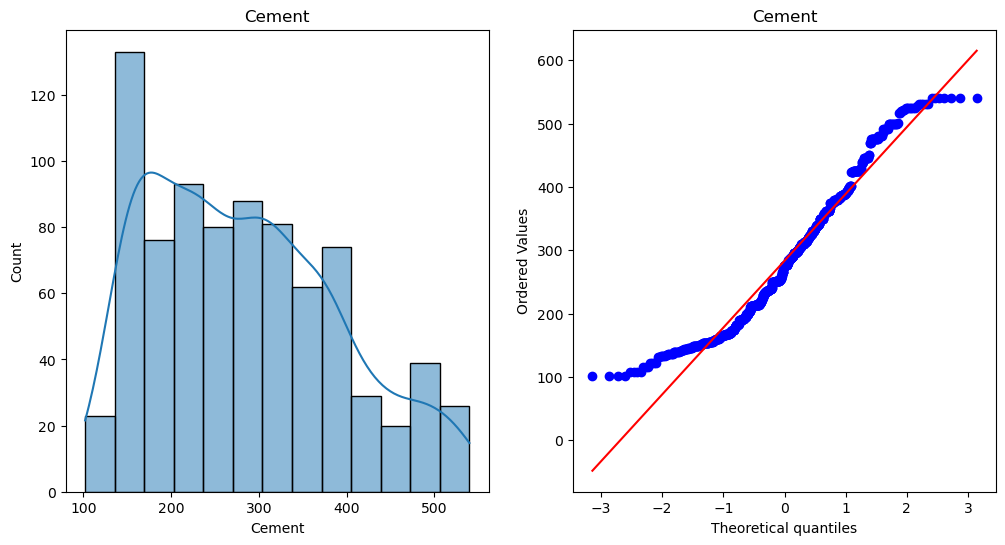

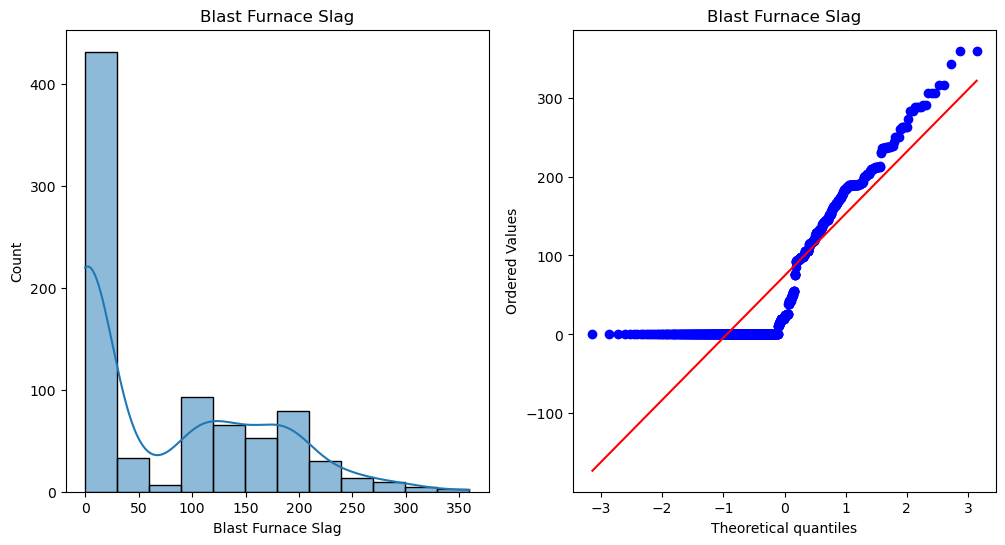

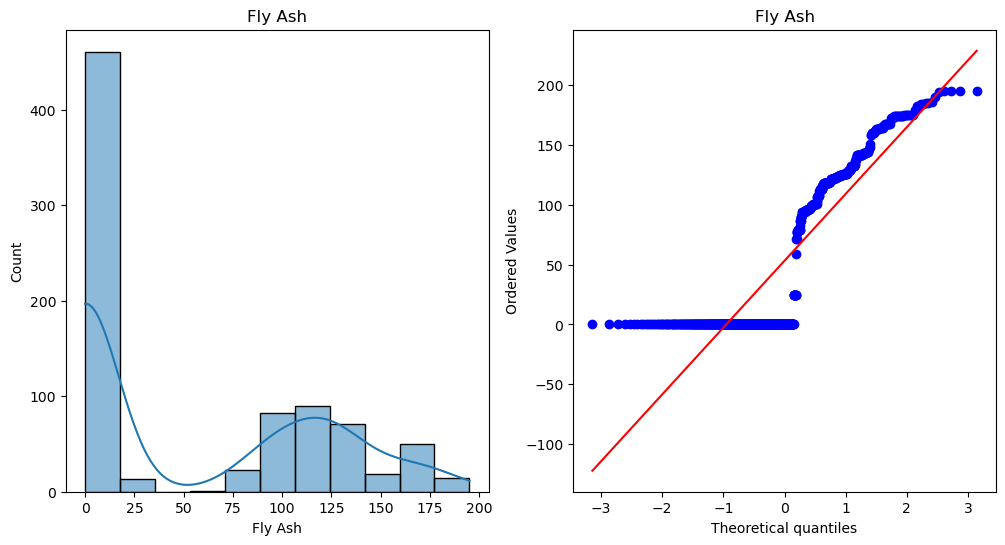

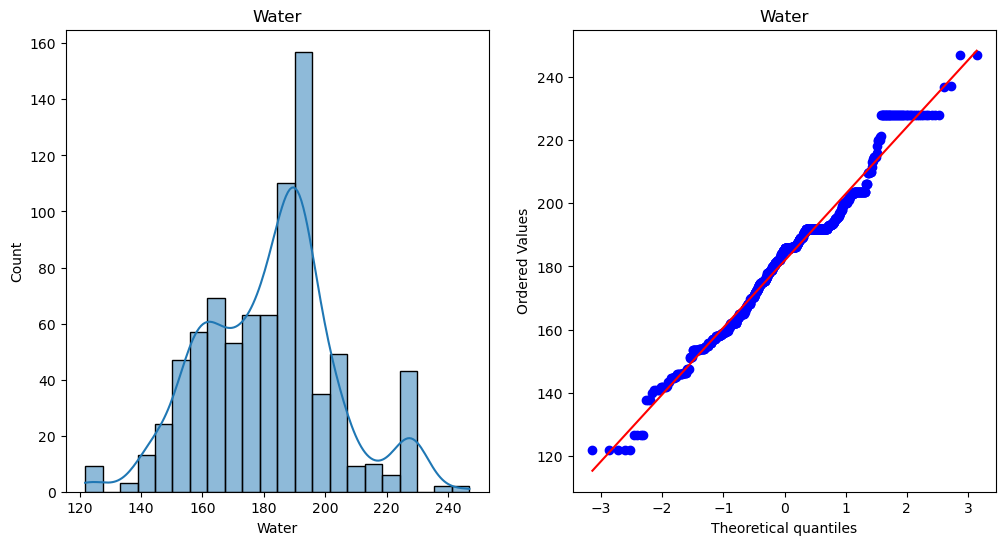

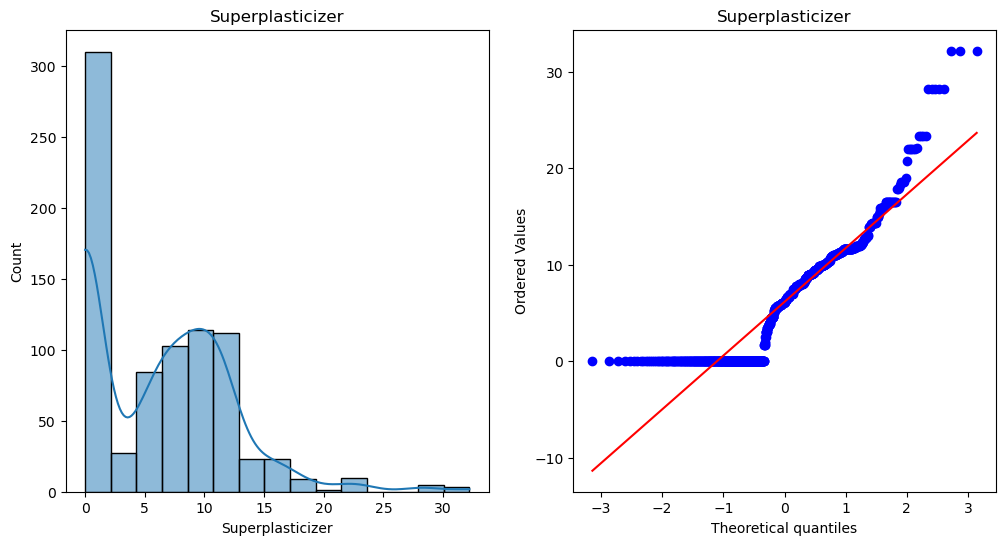

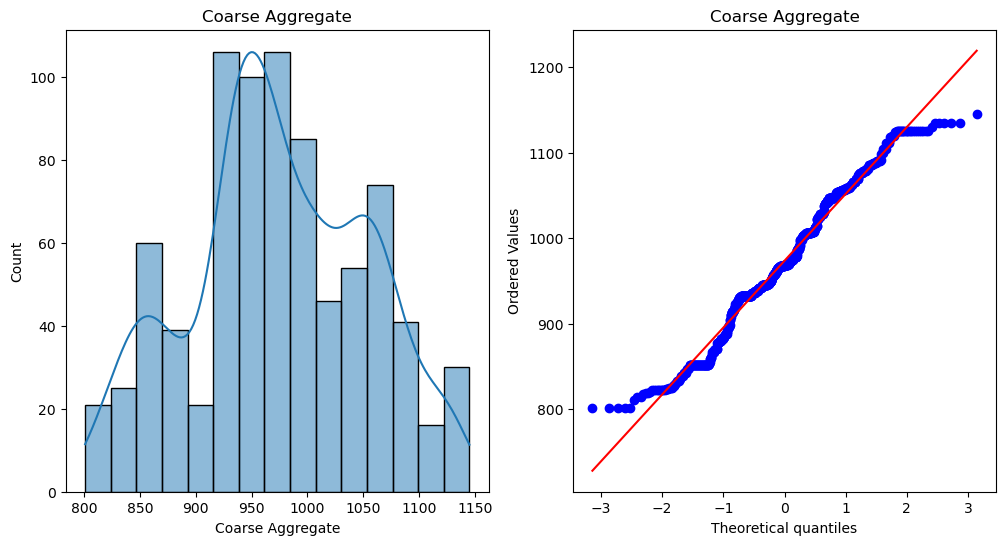

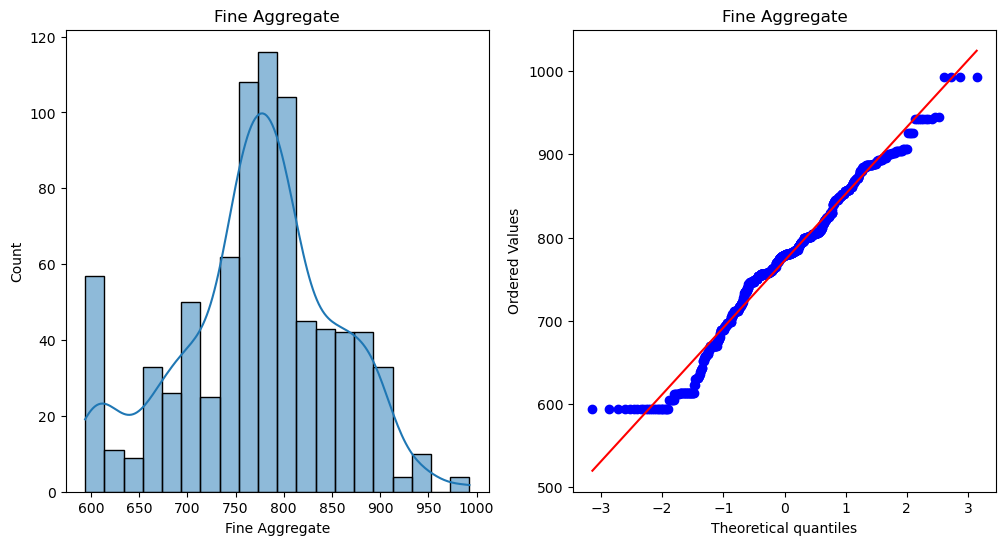

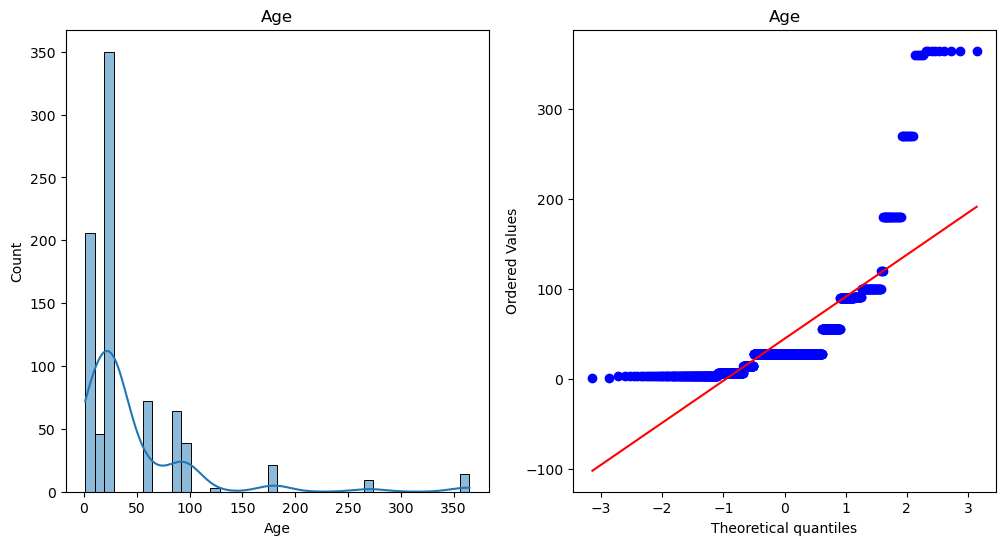

In [29]:
for col in X_train.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(1,2,2)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()



## using Power Transfrom

In [31]:
# using box-cox
pt=PowerTransformer(method="box-cox")
X_train_transformed=pt.fit_transform(X_train+0.00001)
X_test_transformed=pt.transform(X_test+0.00001)



In [32]:
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred1=lr.predict(X_test_transformed)
r2_score(y_test,y_pred1)

0.8054599374335425

In [33]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.665853794702427

In [36]:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)


## Plotting After and Before power transformer

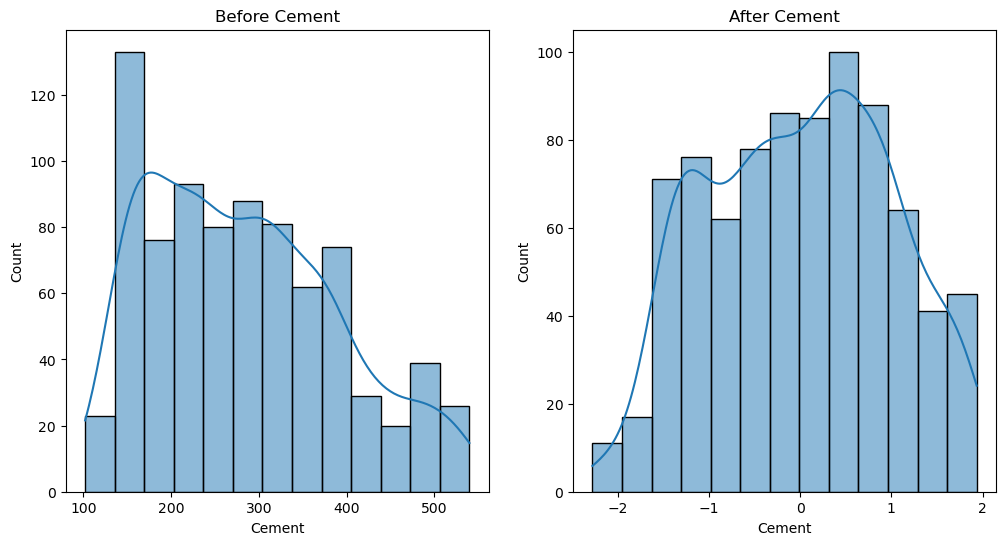

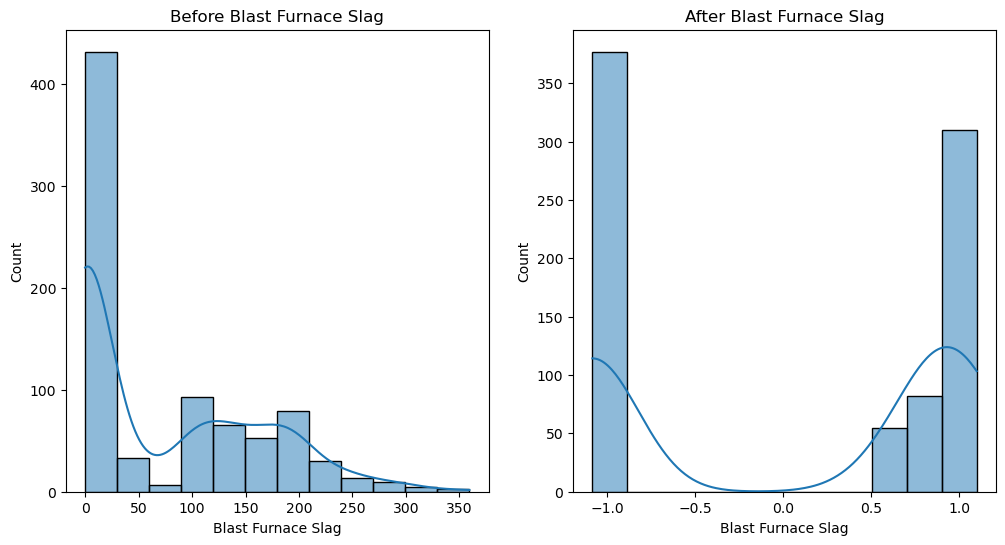

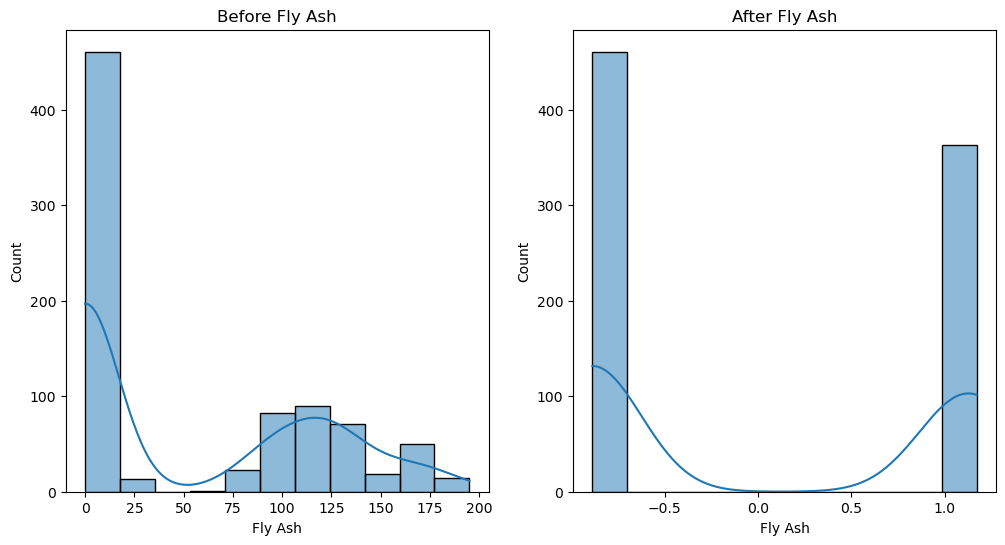

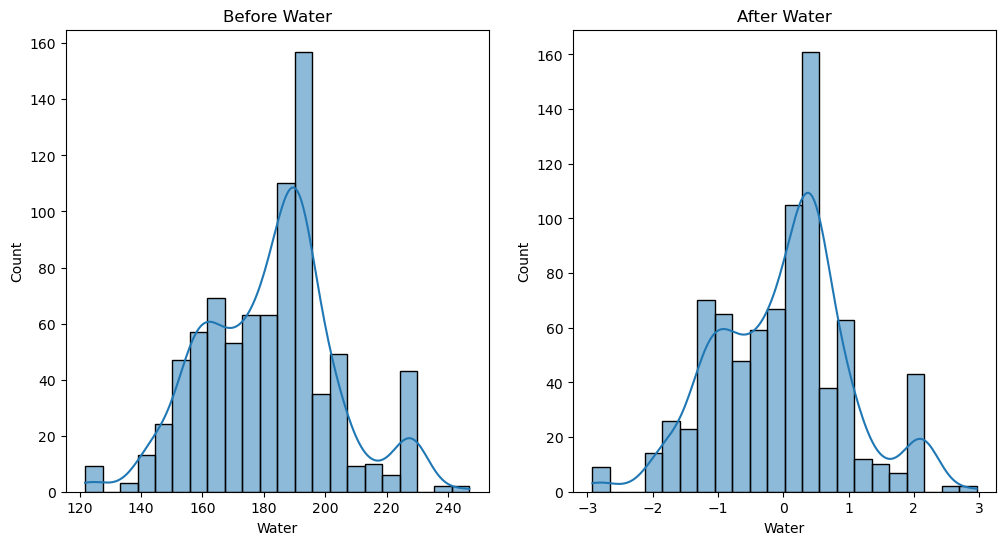

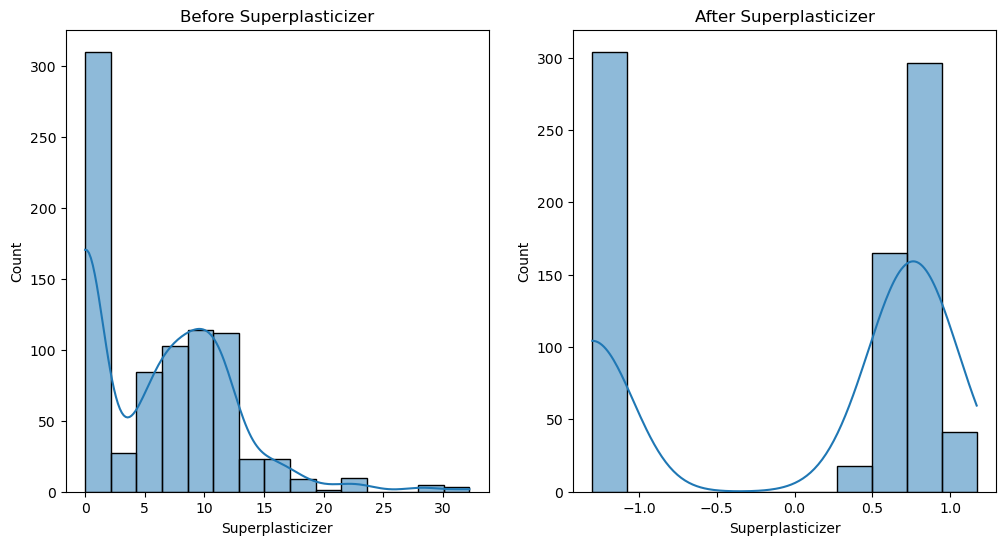

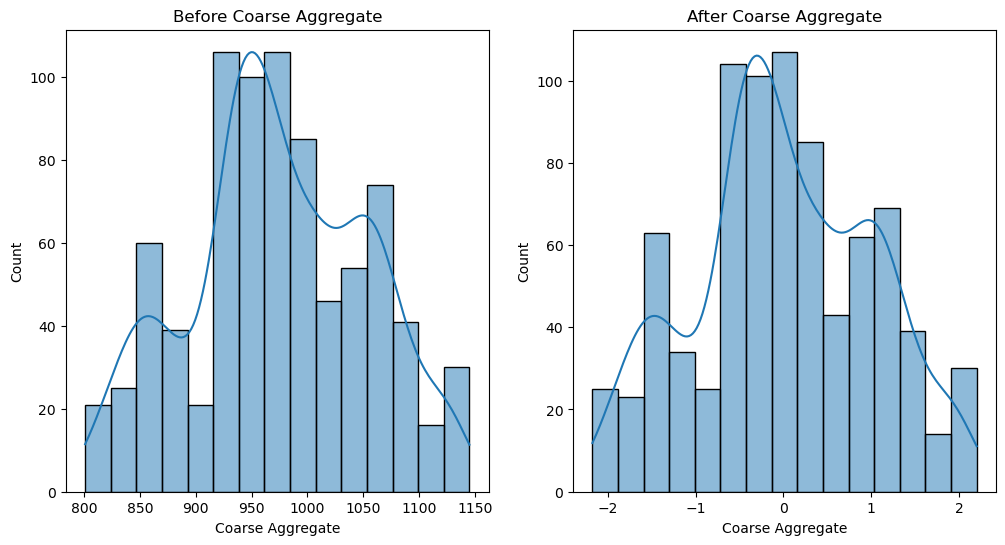

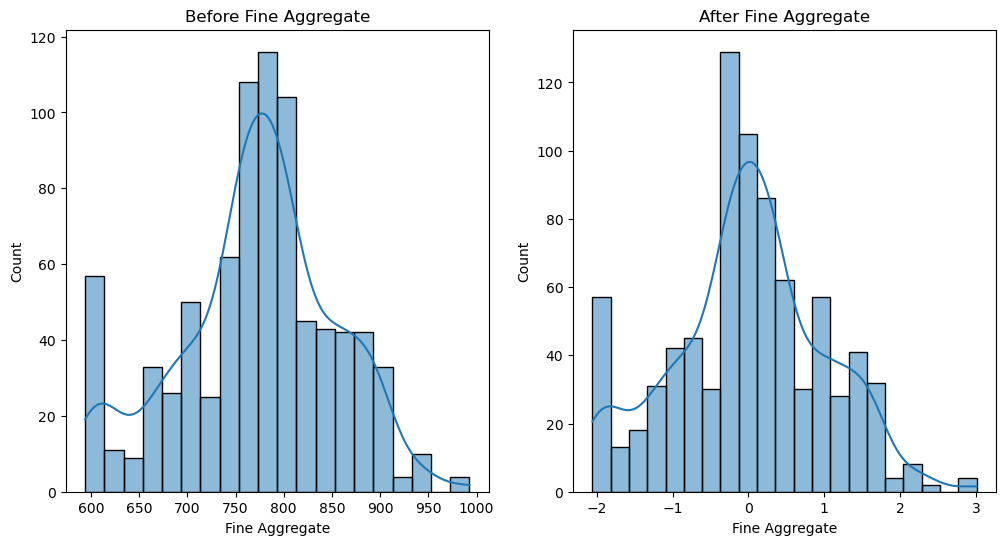

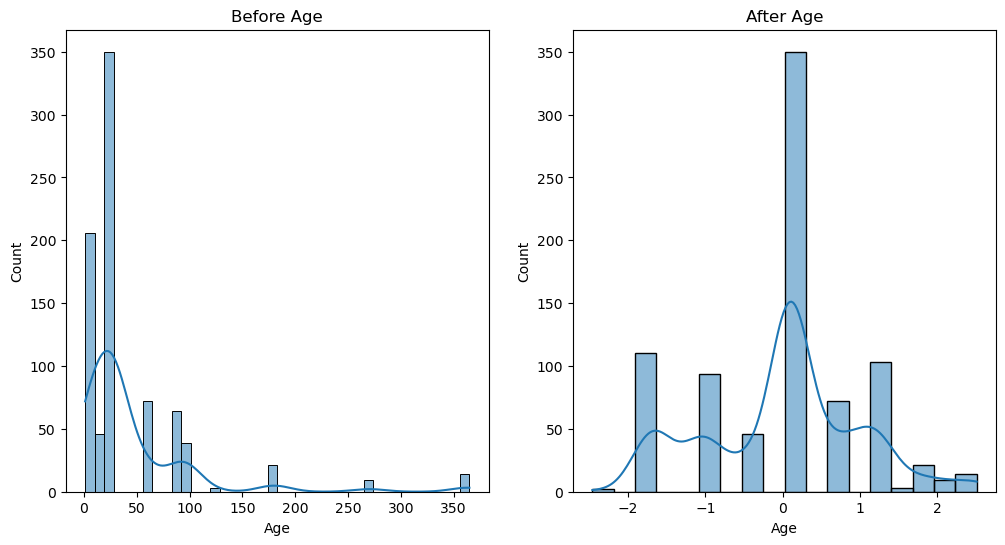

In [39]:
for col in X_train.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.title(f"Before {col}")

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(f"After {col}")
    plt.show()

## apply yeo johnson transformation

In [49]:
pt1=PowerTransformer()
X_train_transformed1=pt1.fit_transform(X_train)
X_test_transformed1=pt1.transform(X_test)
lr=LinearRegression()
lr.fit(X_train_transformed1,y_train)
y_pred2=lr.predict(X_test_transformed1)
r2_score(y_test,y_pred2)

0.8161906513339305

## plotting before and after yeo johnson

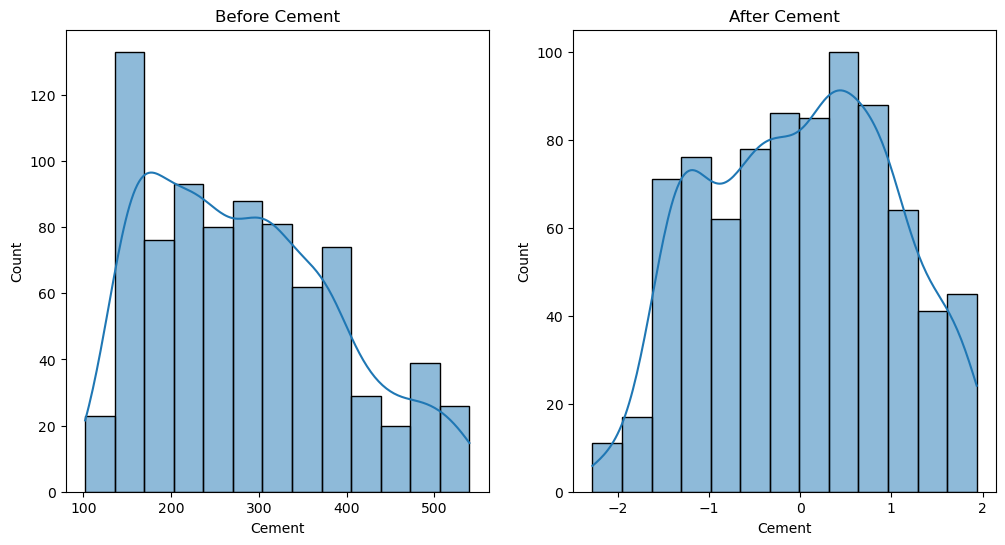

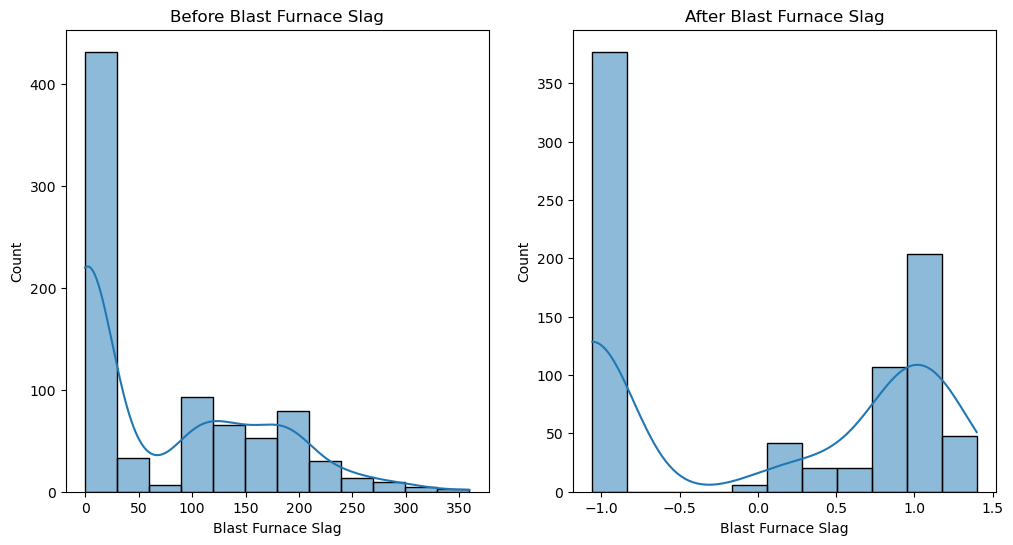

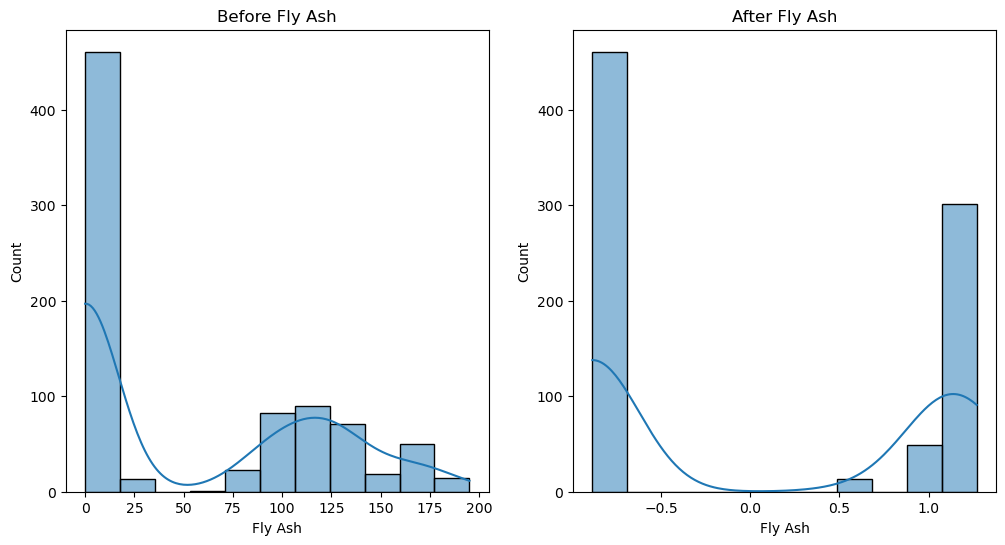

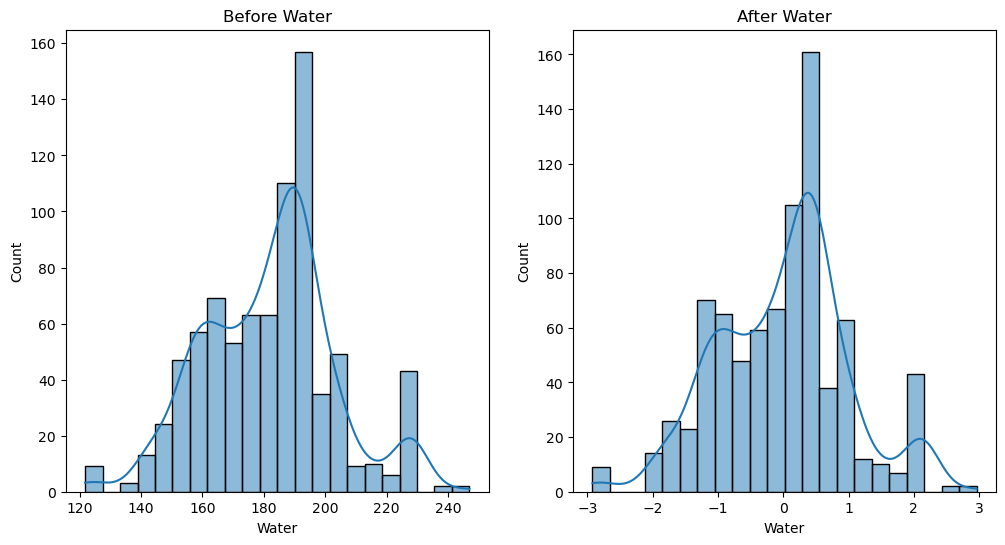

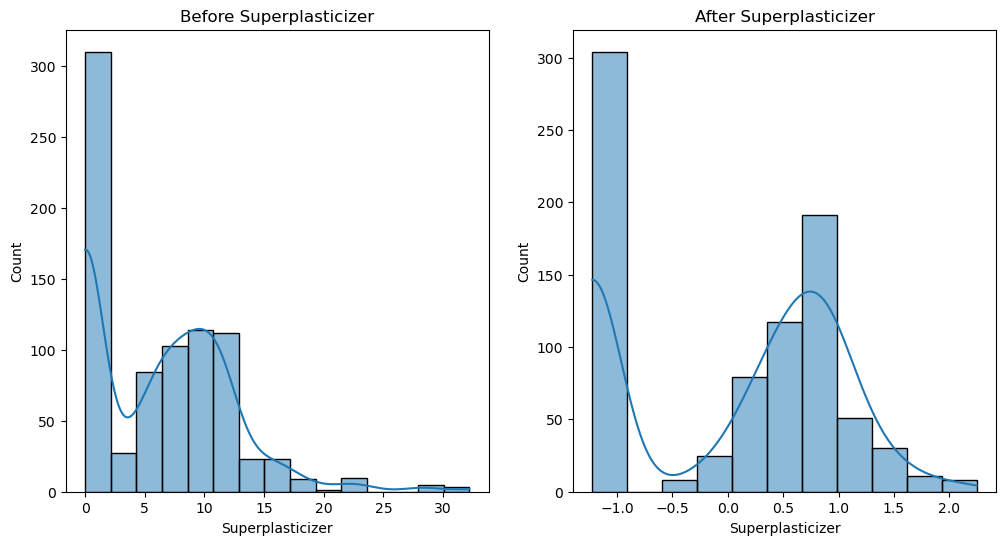

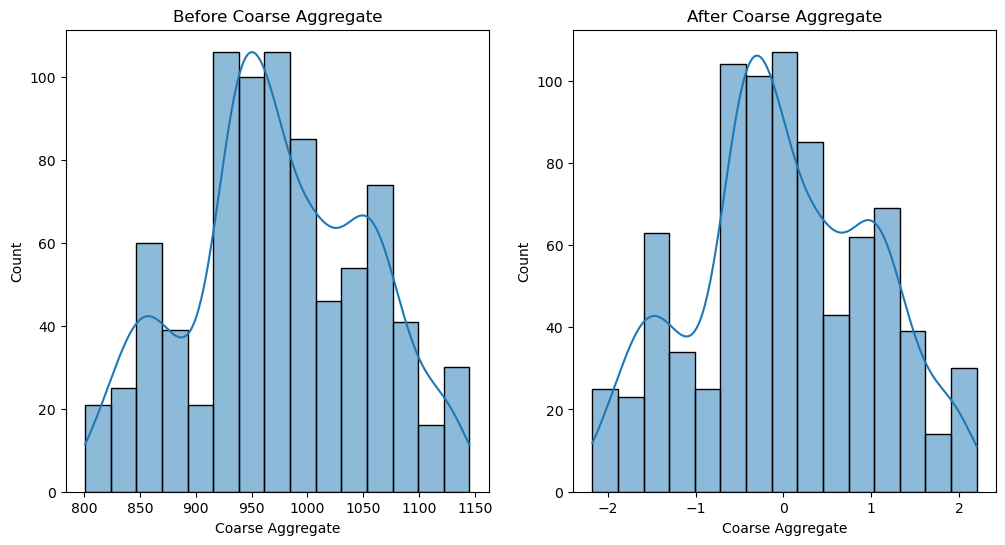

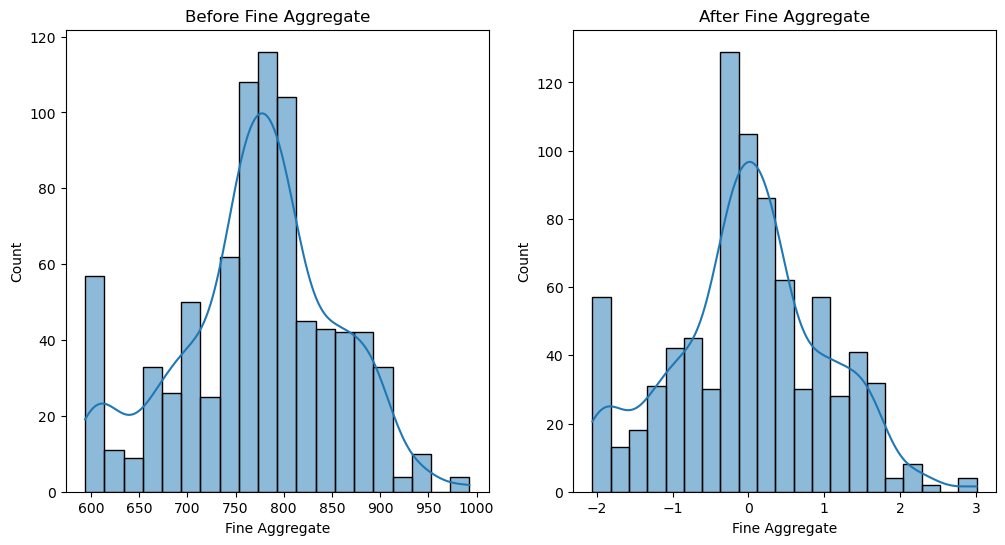

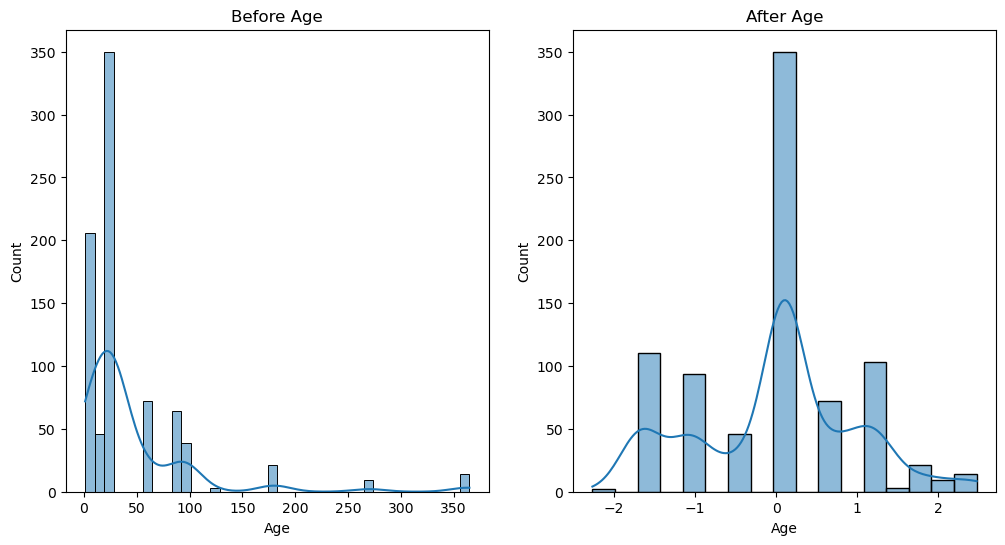

In [50]:
X_train_transformed1=pd.DataFrame(X_train_transformed1,columns=X_train.columns)
for col in X_train.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.title(f"Before {col}")

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed1[col],kde=True)
    plt.title(f"After {col}")
    plt.show()

In [51]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.022924,0.015715
2,Fly Ash,-0.028797,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.087911,0.253935
5,Coarse Aggregate,1.129167,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885
